In [ ]:
import logging
import sys
import warnings
warnings.filterwarnings(action ='ignore', category = UserWarning, module = 'gensim')
from gensim.corpora import WikiCorpus

# 將 wiki 資料集載下後進行 xml convert to txt 
class Wiki_to_txt(object):

    def __init__(self):
        # 用默認 Formatter 為日誌系統建立一個 StreamHandler ，設置基礎配置並加到 root logger 中
        logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

    # 使用方法 https://radimrehurek.com/gensim/corpora/wikicorpus.html
    def set_wiki_to_txt(self, wiki_data_path = None):
        if wiki_data_path == None:
            # 系統下參數
            if len(sys.argv) != 2:
                print("Please Usage: python3 " + sys.argv[0] + " wiki_data_path")
                exit()
            else:
                wiki_corpus = WikiCorpus(sys.argv[1], dictionary = {})
        else:
            wiki_corpus = WikiCorpus(wiki_data_path, dictionary = {})
        # wiki.xml convert to wiki.txt
        with open("wiki_text.txt", 'w', encoding = 'utf-8') as output:
            text_count = 0
            for text in wiki_corpus.get_texts():
                # save use string(gensim)
                output.write(' '.join(text) + '\n')
                text_count += 1
                if text_count % 10000 == 0:
                    logging.info("目前已處理 %d 篇文章" % text_count)
            print("轉檔完畢!")
            
if __name__ == "__main__":
    wiki_to_txt = Wiki_to_txt()
    # 將 wiki xml 轉換成 wiki txt
    wiki_to_txt.set_wiki_to_txt("zhwiki-latest-pages-meta-current.xml")

In [ ]:
# -*- coding: utf-8 -*-
import jieba
import logging
from hanziconv import HanziConv

# 進行斷詞並過濾 stopword
class Segmentation(object):

    def __init__(self):
        # 用默認 Formatter 為日誌系統建立一個 StreamHandler ，設置基礎配置並加到 root logger 中
        logging.basicConfig(format = "%(asctime)s : %(levelname)s : %(message)s", level = logging.INFO)
        self.stopwordset = set()
        
    # 讀取 stopword 辭典，並存到 stopwordset
    def set_stopword(self):
        with open("stopwords.txt", "r", encoding = "utf-8") as stopwords:
            for stopword in stopwords:
                self.stopwordset.add(stopword.strip('\n'))
        #print(self.stopwordset)
        print("StopWord Set 已儲存!")

    # 簡 to 繁
    def simplified_to_traditional(self):
        logging.info("等待中..(簡 to 繁)")
        traditional = open("traditional.txt", "w", encoding = "utf-8")
        with open("wiki_text.txt", "r", encoding = "utf-8") as simplified:
            for s in simplified:
                traditional.write(HanziConv.toTraditional(s))
        print("成功簡體轉繁體!")
        traditional.close()

    # 斷詞(Segmentation)並過濾掉停用詞(Stop Word)
    def segmentation(self):
        logging.info("等待中..(jieba 斷詞，並過濾停用詞)")
        segmentation = open("segmentation.txt", "w", encoding = "utf-8")
        with open("traditional.txt", "r", encoding = "utf-8") as Corpus:
            for sentence in Corpus:
                sentence = sentence.strip("\n")
                pos = jieba.cut(sentence, cut_all = False)
                for term in pos:
                    if term not in self.stopwordset:
                        segmentation.write(term + " ")
        print("jieba 斷詞完畢，並已完成過濾停用詞!")
        segmentation.close()

if __name__ == "__main__":
    segmentation = Segmentation()
    # 讀取停用詞辭典
    segmentation.set_stopword()
    # data 進行簡體轉繁體
    segmentation.simplified_to_traditional()
    # 進行 jieba 斷詞同步過濾停用詞，並產生辭典
    segmentation.segmentation()

In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning, module = 'gensim')
from gensim.models import word2vec

# 主要透過 gensim 訓練成 model 並供使用
class Train(object):

    def __init__(self):
        pass

    # 可參考 https://radimrehurek.com/gensim/models/word2vec.html 更多運用
    def train(self):
        print("訓練中...(喝個咖啡吧^0^)")
        # Load file
        sentence = word2vec.Text8Corpus("segmentation.txt")
        # Setting degree and Produce Model(Train)
        model = word2vec.Word2Vec(sentence, size = 300, window = 10, min_count = 5, workers = 4, sg = 1)
        # Save model 
        model.wv.save_word2vec_format(u"wiki300.model.bin", binary = True)
        print("model 已儲存完畢")

if __name__ == "__main__":
    t = Train()
    # 訓練(shallow semantic space)
    t.train()

In [1]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning, module = 'gensim')
from gensim.models.keyedvectors import KeyedVectors

# 載入 model 並去運用
def main():
    # 可參考 https://radimrehurek.com/gensim/models/word2vec.html 更多運用
    # How to use bin(model)?
    word_vectors = KeyedVectors.load_word2vec_format("wiki300.model.bin", binary = True) 
    res = word_vectors.wv.most_similar('楊冪', topn = 10)
    print("'楊冪'前10名相似:")   
    for item in res:
        print(item[0] + "," + str(item[1]))
    print("\n'裴秀智','楊冪'之間相似度:")
    res = word_vectors.similarity('裴秀智', '楊冪')
    print(res)
    print("\n'爸爸'之於'老公',如'媽媽'之於'老婆':")
    res = word_vectors.most_similar(positive = ['爸爸', '老公'], negative = ['媽媽'], topn = 5)
    for item in res:
        print(item[0] + "," + str(item[1]))

if __name__ == "__main__":
    main()

/home/foxitrtx/anaconda3/envs/dis-kroos/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


'楊冪'前10名相似:
唐嫣,0.7677088975906372
佟麗婭,0.7372995018959045
杜淳,0.734392523765564
蔣夢婕,0.7341614961624146
張歆藝,0.7324246168136597
劉詩詩,0.7275354266166687
萬茜,0.7256581783294678
李小冉,0.7248772382736206
王麗坤,0.7247992157936096
袁弘,0.7178788185119629

'裴秀智','楊冪'之間相似度:
0.35043153

'爸爸'之於'老公',如'媽媽'之於'老婆':
老婆,0.6534505486488342
男閨蜜,0.6224111318588257
男友,0.6083885431289673
王爺爺,0.6024327278137207
吳總,0.5989830493927002


In [69]:
word_vectors = KeyedVectors.load_word2vec_format("wiki300.model.bin", binary = True)
print(len(word_vectors.vocab))
word_vectors.vocab

1141592


{'的': <gensim.models.keyedvectors.Vocab at 0x7f185b6bdda0>,
 '在': <gensim.models.keyedvectors.Vocab at 0x7f185b6bdc50>,
 '於': <gensim.models.keyedvectors.Vocab at 0x7f185b5688d0>,
 '是': <gensim.models.keyedvectors.Vocab at 0x7f185b568908>,
 '為': <gensim.models.keyedvectors.Vocab at 0x7f185b568b70>,
 '齣': <gensim.models.keyedvectors.Vocab at 0x7f185b568668>,
 '年': <gensim.models.keyedvectors.Vocab at 0x7f185b568be0>,
 '後': <gensim.models.keyedvectors.Vocab at 0x7f185b568518>,
 '和': <gensim.models.keyedvectors.Vocab at 0x7f185b5684a8>,
 '傢': <gensim.models.keyedvectors.Vocab at 0x7f185b568ba8>,
 '颱': <gensim.models.keyedvectors.Vocab at 0x7f185b568278>,
 '與': <gensim.models.keyedvectors.Vocab at 0x7f185b568160>,
 '有': <gensim.models.keyedvectors.Vocab at 0x7f185b568940>,
 '剋': <gensim.models.keyedvectors.Vocab at 0x7f185b5686a0>,
 '裏': <gensim.models.keyedvectors.Vocab at 0x7f185b568c88>,
 '瞭': <gensim.models.keyedvectors.Vocab at 0x7f185b5682e8>,
 '小行星': <gensim.models.keyedvectors.Voca

In [70]:
import pandas as pd
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df
most_similar(word_vectors, ['懷孕', '網拍', '補習', '東京', '金宇彬','化妝品', '奧斯卡', '主管', '女孩'])

/home/foxitrtx/anaconda3/envs/dis-kroos/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


,懷孕,cos,網拍,cos,補習,cos,東京,cos,金宇彬,cos,化妝品,cos,奧斯卡,cos,主管,cos,女孩,cos
0,懷孕時,0.763028,外拍,0.773131,教班,0.615965,大阪,0.667257,李鍾碩,0.780812,保養品,0.752053,金像,0.763850,負責人,0.635407,男孩,0.736474
1,瞭懷孕,0.744218,宋蘋恩,0.714434,社老師,0.615670,京都,0.649360,裴秀智,0.767381,護膚品,0.735196,金球,0.710396,人事主管,0.632141,灰姑娘,0.671495
2,早產,0.736360,王麗雅,0.708296,科體育,0.614463,tokyo,0.637274,金智媛,0.762657,mamonde,0.710983,最佳影片,0.708085,資金部,0.624515,少女,0.658179
3,流產,0.718259,搭術,0.701376,大補習,0.611782,名古屋,0.633433,李熙俊,0.761426,compagna,0.708474,正劇類,0.697081,市務部,0.620937,小女孩,0.636321
4,懷孕後期,0.701204,比藝人,0.698259,部商業,0.606995,日東京,0.631348,洪宗玄,0.754888,護膚,0.705581,影藝學,0.692818,行政主管,0.620047,小孩,0.621176
5,不孕,0.700073,購物專,0.697980,升學班,0.600836,福岡,0.617696,鄭大胤,0.754296,cosmetics,0.701828,瞭奧斯卡,0.691851,稅務部,0.614320,朋友,0.604149
6,身孕,0.699182,兒廣告,0.696990,延教班,0.598079,福岡演,0.609432,卞耀漢,0.751740,美妝店,0.699844,外語片,0.682058,負責督導,0.612716,偶像,0.601851
7,分娩,0.698350,衣廣告,0.696910,幼保科,0.596817,東京歌,0.608367,崔泰俊,0.751654,celderma,0.696268,獎上,0.675599,衛生官,0.606727,聊宅,0.599517
8,現懷孕,0.695474,徐至琦,0.696829,藝班,0.595709,及福岡,0.605228,丁海寅,0.751368,laneige,0.688435,獲奧斯卡,0.674488,財政人員,0.603576,女孩子,0.597167
9,非計畫,0.691312,美人誌,0.696380,國教班,0.595537,現東京,0.604461,蘇怡賢,0.751161,clalen,0.687887,獎和奧斯卡,0.672920,部總監,0.601714,可愛的,0.596150


(1141592, 300)
(1141592, 2)
[-0.05174261 -0.64675415]


/home/foxitrtx/anaconda3/envs/dis-kroos/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/home/foxitrtx/anaconda3/envs/dis-kroos/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


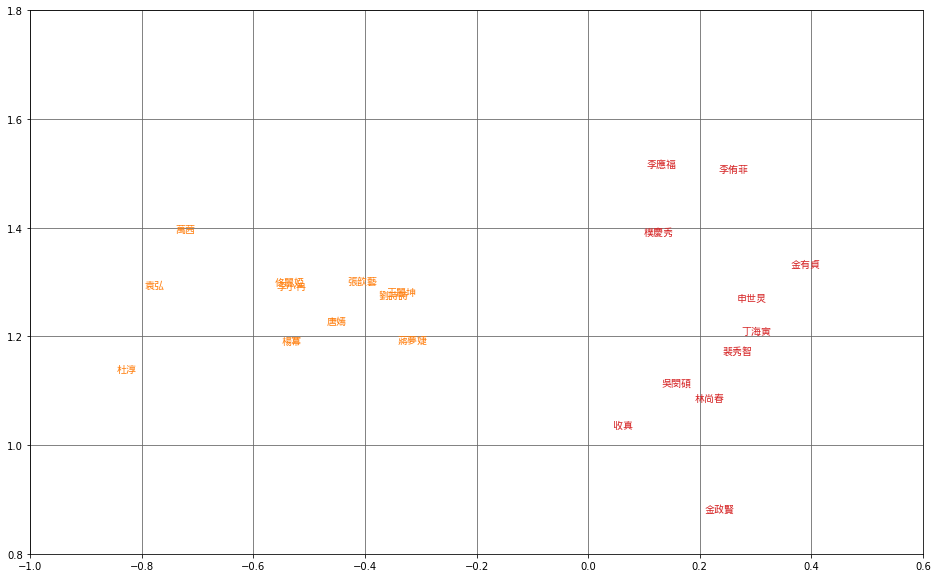

In [71]:
import numpy as np
# 視覺化套件
import matplotlib
import matplotlib.pyplot as plt
# 主成分因子
from sklearn.decomposition import PCA
# 引入上述將文章斷詞後轉為300維向量的資料
word_vectors = KeyedVectors.load_word2vec_format("wiki300.model.bin", binary = True)
rawWordVec = word_vectors.vectors
print(rawWordVec.shape)
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
print(X_reduced.shape)
print(X_reduced[894787])
# 須先下載wqy-microhei.ttc，因中文顯示需做特殊處理
zhfont = matplotlib.font_manager.FontProperties(fname='./wqy-microhei.ttc')
# 畫圖
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
index1 = word_vectors.wv.most_similar('裴秀智', topn=10)
index2 = word_vectors.wv.most_similar('楊冪', topn=10)
index1 = [word_vectors.vocab[word[0]].index for word in index1]
index2 = [word_vectors.vocab[word[0]].index for word in index2]
# add the index of center word 
index1=np.append(index1,word_vectors.vocab['裴秀智'].index)
index2=np.append(index2,word_vectors.vocab['楊冪'].index)
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1],word_vectors.index2word[i], fontproperties = zhfont, color='C3')
for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1],word_vectors.index2word[i], fontproperties = zhfont, color= 'C1')
"""
for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C7')
for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C0')
for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C4')
"""
plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax.axis([-1.0,0.6,0.8,1.8])
plt.show()